# Final Project

## Framing

**Introduction**: describe your dataset, and why you're interested in it

In this dataset, Kinect sensors captured students' body postures, location, and gestures in a makerspace over the period of a 13-weeks semester, recording nearly half a million observations from 16 students enrolled in a class. 

I am interested in this dataset because I am currently involved in the next iteration of the Makerspace project and it would be good to gain more familiarity with the dataset by analyzing it in this final project. 

**Research question(s)**: describe the overall research question of your project

Can the activities of students (e.g., using a laser cutter, interacting with someone, etc.) be detected from their location and their body postures in the makerspace?

**Hypotheses**:
    * Describe 2-3 hypotheses that you're planning to test with your dataset
    * Each hypoteses should be based on academic research (cite a paper) and/or background knowledge that you have about the dataset if you've collected it yourself (e.g., if you've conducted interviews)
    * Each hypotheses should be formulated as an affirmation (and not a question)
    * You can also describe alternative hypotheses, if you think that your results could go either way (but again, have a rationale as for why)

    
**Hypothesis 1**
Using the x-y coordinates of the head joint, the approximate position of students can be inferred, which then informs if they are using tools or working with others within the makerspace. 

**Hypothesis 2**
Students who have joint line of sight with their partners indicates collaboration within the makerspace. 

**Papers**
Hall, E. T. (1966). The Hidden Dimension. Anchor Books.

Reilly, J.M. et al. Exploring Collaboration Using Motion Sensors and Multi-Modal Learning Analytics. Educational Data Mining Conference 2018.


**Results**:
    * how are you planning to test each hypothesis? What models are you thinking of using?
I am planning to first derive features such as proximity, hand gesturing and line of sight of students to indicate the activities of students within the makerspace. Thereafter, I will train a machine learning algorithm based on these features to predict the activities of students. As a test of the accuracy of the algorithm, I will exclude one week of data during the training stage and test the algorithm later using this test set. For the test set, manual coding using video would be done to denote the activities of the students instead of using the generated features. 


    * what are the best results you can hope for? Is that interesting / relevant for other researchers?
The best results would be a strong correlation between the generated features and student activities. This would be interesting for other researchers as the profiling of student activities could lead to other areas of research such as personalized interventions and quality of social interactions.

    * what are implications of your potential findings for practioners? 
Students activities could be inferred from the generated features without the teachers having to pay continuous attention to each and every student within the makerspace. This presents practioners a way of understanding their students to cater to their individual learning needs.

**Threads**
    * Describe issues that might arise during the analyses above
It might be possible that we may not derive features that can successfully predict the activities of students or we may also be looking at the incorrect features of the body movement to inform us of the activities of students.

    * Come up with backup plans in case you run into theses issues
Think of alternative features of the students' body movement or allow the models to uncover the relevant features without making any prior assumptions.

## Data Exploration

Describe your raw data below; provide definition / explanations for the measures you're using

The raw data consists of student information (eg person_id, name), skeletal joint data, facial expressions (eg isTalking) and collection information (eg timestamp, kinect_id). For the purpose of this investigation, we will drop information mostly related to facial expressions as 1) these variables are dichotomous 2) they contain a limited range of facial expressions.

## Data Cleaning

Clean you data in this section, and make sure it's ready to be analyzed for next week!

In [1]:
# import files from directory

import os

files = []

for file in os.listdir('./test'):
    if file.endswith('.csv'):
        files.append(file)

print(files)

['test.csv']


In [2]:
# create new folder to store cleaned data

os.mkdir('./data_cleaned')
os.listdir('./')

['.DS_Store',
 'test',
 'dataset',
 'data_cleaned',
 'code',
 'Wee9-Final-Project.ipynb',
 '.ipynb_checkpoints',
 '.git']

In [3]:
# clean data and output as csv to folder

import pandas as pd

instructor_list = ['sammie','othertwo','otherthree','name','yanni','carlie','billy',
                   'othereight','otherfive','otherfour','otherone','otherseven','othersix']

# Select rows for timestamp 4/6/2018  4:10:37 PM to 4/6/2018  5:50:30 PM 
v =[]
for i in range(25533,29507): 
    v.append(i) 
    
for file in os.listdir('./test'):
    if file.endswith('.csv'):
        file_input = os.path.join('./test',file)
        df = pd.read_csv(file_input)
        df = df.loc[df['Unnamed: 0'].isin(v)]
        df_cleaned = df.drop([df.columns[0],'name_aga_conf','confidence_value','name_aga_freq','frequency','freq_count',
                            'isWearingGlasses','isSmiling','leftHandRaised','rightHandRaised',
                           'ip','et_timestamp','skeleton','person_id_lifespan','face_detected','timestamp'], axis=1)
        df_cleaned.dropna(inplace=True)
        
        for name in instructor_list:
            indexNames = df_cleaned[df_cleaned['weighted_name'] == name].index
            df_cleaned.drop(indexNames,inplace=True)
        
        df_cleaned.reset_index(inplace=True,drop=True)
        file_output = os.path.join('./data_cleaned',file)
        df_cleaned.to_csv(file_output)
        
print(os.listdir('./data_cleaned'))

['test.csv']


## Data Analysis (Preparation)

In [4]:
# import files from directory

import os

files = []

for file in os.listdir('./data_cleaned'):
    if file.endswith('.csv'):
        files.append(file)

print(files)

['test.csv']


In [5]:
# create new folder to store data for analysis

os.mkdir('./data_analysis')
os.listdir('./')

['data_analysis',
 '.DS_Store',
 'test',
 'dataset',
 'data_cleaned',
 'code',
 'Wee9-Final-Project.ipynb',
 '.ipynb_checkpoints',
 '.git']

In [6]:
# combine all data into single dataframe

import pandas as pd

df_raw = pd.DataFrame()

for file in files:
    file_input = os.path.join('./data_cleaned',file)
    df_temp = pd.read_csv(file_input)
    df_raw = pd.concat( [df_raw, df_temp], ignore_index=True)
    print(df_raw.shape)
    

df_raw = df_raw.drop('Unnamed: 0', axis=1)

(2181, 31)


In [7]:
# round timestamp

df_raw['minute'] = pd.to_datetime(df_raw['timeframe']).dt.round('min')

In [8]:
# number of students

master_namelist = ['ann', 'ryan', 'ken', 'pat', 'liz', 'zoe', 'kim', 'eva', 
                   'ron', 'meg', 'dan', 'sue', 'ben', 'andreas', 'mia', 
                   'bea', 'amy', 'lucia', 'noe', 'tonya']

namelist = set(df_raw['weighted_name'])
namelist = list(namelist)
print(namelist)

n = len(namelist)
print(n)

['pat', 'dan', 'eva', 'mia', 'ben', 'ken', 'zoe', 'sue', 'kim']
9


In [9]:
# output df as csv

file_output = os.path.join('./data_analysis','df_raw.csv')
df_raw.to_csv(file_output)

## Data Analysis (Proximity)

In [10]:
# import files from directory

import os

files_a = []

for file in os.listdir('./data_analysis'):
    if file.endswith('.csv'):
        files_a.append(file)

print(files_a)

['df_raw.csv']


In [11]:
# combine all data into single dataframe

import pandas as pd

df_raw = pd.DataFrame()

for file in files_a:
    file_input = os.path.join('./data_analysis',file)
    df_temp = pd.read_csv(file_input)
    df_raw = pd.concat( [df_raw, df_temp], ignore_index=True)
    df_raw = df_raw.drop('Unnamed: 0', axis=1)
    print(df_raw.shape)

(2181, 31)


In [12]:
# function to calculate euclidean distance 

import numpy as np

def map_distance(x1,y1,x2,y2):
    dist = np.sqrt((x1-x2)**2+(y1-y2)**2)
    return dist

In [13]:
# create df_pos_function to generate proximity feature

def df_pos_function(df_raw,dist,namelist):
    laser_coords = [1.50,0.75]
    printer_coords = [3.75,0.75]
    tools = ['laser_cutter', '3D_printer']
    activities = namelist + tools 
    minute_index = list(set(df_raw['minute']))

    df_pos = df_raw.groupby(['minute','weighted_name'])['Head_x','Head_y', 
                                                        'movementAmount','isTalking',
                                                        'headAngle','Head_z', 
                                                        'ShoulderLeft_x', 'ShoulderLeft_y', 'ShoulderLeft_z', 
                                                        'ShoulderRight_x','ShoulderRight_y', 'ShoulderRight_z', 
                                                        'ElbowLeft_x', 'ElbowLeft_y', 'ElbowLeft_z', 
                                                        'ElbowRight_x', 'ElbowRight_y', 'ElbowRight_z',
                                                        'HandLeft_x', 'HandLeft_y', 'HandLeft_z', 
                                                        'HandRight_x', 'HandRight_y', 'HandRight_z', 
                                                        'leanVector_x', 'leanVector_z'].mean()

    df_pos = pd.concat([df_pos, pd.DataFrame(columns = activities)],axis=1)
    df_pos.fillna(0,inplace=True)

    for i in range(len(minute_index)):
        time = minute_index[i]
        df_temp = df_pos.xs(minute_index[i])
        df_temp = df_temp.reset_index()

    # Activity
        for j in range(df_temp.shape[0]-1):
            c = df_temp.shape[0]-j-1
            for k in range(c):
                d = k + j + 1
                name1 = df_temp.iloc[j][0]
                name2 = df_temp.iloc[d][0]
                name1_x = df_temp.iloc[j][1]
                name1_y = df_temp.iloc[j][2]
                name2_x = df_temp.iloc[d][1]
                name2_y = df_temp.iloc[d][2]

                # Collaboration
                if map_distance(name1_x,name1_y,name2_x,name2_y) <= dist:
                    df_pos.loc[(time,name1),name2] = 1
                    df_pos.loc[(time,name2),name1] = 1

                # Tool Use
                if map_distance(name1_x,name1_y,laser_coords[0],laser_coords[1]) <= dist:
                    df_pos.loc[(time,name1),'laser_cutter'] = 1
                if map_distance(name1_x,name1_y,printer_coords[0],printer_coords[1]) <= dist:
                    df_pos.loc[(time,name1),'3D_printer'] = 1
    return df_pos

In [14]:
# output df_pos as csv

dist = 1.5
df_pos = df_pos_function(df_raw,dist,master_namelist)
file_output = os.path.join('./data_analysis','df_pos.csv')
df_pos.to_csv(file_output)

## Data Analysis (Building Models)

In [15]:
# select data for model building

file = '1.5_df_pos(code).csv'
file_input = os.path.join('./code',file)
df_analysis = pd.read_csv(file_input)
print(df_analysis.shape)

selected = ['Head_x', 'Head_y','movementAmount','isTalking', 'headAngle', 'Head_z', 
            'ShoulderLeft_x', 'ShoulderLeft_y','ShoulderLeft_z', 
            'ShoulderRight_x', 'ShoulderRight_y','ShoulderRight_z', 
            'ElbowLeft_x', 'ElbowLeft_y', 'ElbowLeft_z',
            'ElbowRight_x', 'ElbowRight_y', 'ElbowRight_z', 
            'HandLeft_x','HandLeft_y', 'HandLeft_z', 
            'HandRight_x', 'HandRight_y', 'HandRight_z',
            'leanVector_x', 'leanVector_z', 
            'laser_cutter','3D_printer'] + master_namelist

X = df_analysis[selected].values

y = df_analysis['activity'].values
dummy_y = pd.get_dummies(df_analysis['activity'])

(195, 51)


In [16]:
# Supervised Learning: KNeighborsClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

knn = KNeighborsClassifier(n_neighbors=n)

knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)

print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.6911764705882353
0.7288135593220338
[[ 0  0  0  0  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  2  0]
 [ 2  0  0  0  4  0]
 [ 2  0  0  0 42  1]
 [ 0  0  0  0  3  1]]
              precision    recall  f1-score   support

        cben       0.00      0.00      0.00         0
        ckim       0.00      0.00      0.00         2
        cmia       0.00      0.00      0.00         2
        czoe       0.00      0.00      0.00         6
           i       0.79      0.93      0.86        45
    tprinter       0.50      0.25      0.33         4

   micro avg       0.73      0.73      0.73        59
   macro avg       0.22      0.20      0.20        59
weighted avg       0.64      0.73      0.68        59



/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


## Data Prediction

In [17]:
# import files from directory

import os

files = []

for file in os.listdir('./dataset'):
    if file.endswith('.csv'):
        files.append(file)

print(files)

['6.csv', '7.csv', '5.csv', '4.csv', '3.csv', '2.csv', '10.csv', '11.csv', '13.csv', '12.csv', '9.csv']


In [18]:
# create new folder to store predicted data

os.mkdir('./data_prediction')
os.listdir('./')

['data_analysis',
 '.DS_Store',
 'test',
 'dataset',
 'data_cleaned',
 'code',
 'data_prediction',
 'Wee9-Final-Project.ipynb',
 '.ipynb_checkpoints',
 '.git']

In [19]:
# clean data and combine into single dataframe

import pandas as pd

instructor_list = ['sammie','othertwo','otherthree','name','yanni','carlie','billy',
                   'othereight','otherfive','otherfour','otherone','otherseven','othersix']

df = pd.DataFrame()

for file in files:
    file_input = os.path.join('./dataset',file)
    df_temp = pd.read_csv(file_input)
    df_cleaned = df_temp.drop([df_temp.columns[0],'name_aga_conf','confidence_value','name_aga_freq','frequency','freq_count',
                            'isWearingGlasses','isSmiling','leftHandRaised','rightHandRaised',
                           'ip','et_timestamp','skeleton','person_id_lifespan','face_detected','timestamp'], axis=1)
    
    df_cleaned.dropna(inplace=True)
        
    for name in instructor_list:
        indexNames = df_cleaned[df_cleaned['weighted_name'] == name].index
        df_cleaned.drop(indexNames,inplace=True)
        
    df_cleaned.reset_index(inplace=True,drop=True)
    df = pd.concat( [df, df_cleaned], ignore_index=True)
    print(df.shape)

# round timestamp
df['minute'] = pd.to_datetime(df['timeframe']).dt.round('min')

file_output = os.path.join('./data_prediction','df0.csv')
df.to_csv(file_output)

(98056, 30)
(129868, 30)
(145990, 30)
(176603, 30)
(190476, 30)
(235451, 30)
(295929, 30)
(345678, 30)
(388545, 30)
(411932, 30)
(422557, 30)


In [20]:
# Generate proximity feature

dist = 1.5
df_pos = df_pos_function(df,dist,master_namelist)

In [21]:
# Prediction

selected = ['Head_x', 'Head_y','movementAmount','isTalking', 'headAngle', 'Head_z', 
            'ShoulderLeft_x', 'ShoulderLeft_y','ShoulderLeft_z', 
            'ShoulderRight_x', 'ShoulderRight_y','ShoulderRight_z', 
            'ElbowLeft_x', 'ElbowLeft_y', 'ElbowLeft_z',
            'ElbowRight_x', 'ElbowRight_y', 'ElbowRight_z', 
            'HandLeft_x','HandLeft_y', 'HandLeft_z', 
            'HandRight_x', 'HandRight_y', 'HandRight_z',
            'leanVector_x', 'leanVector_z', 
            'laser_cutter','3D_printer'] + master_namelist

X = df_pos[selected].values

y_pred = knn.predict(X)

In [22]:
# output predicted data

df_pos['activity'] = y_pred
file_output = os.path.join('./data_prediction','df_predicted.csv')
df_pos.to_csv(file_output)

## Data Visualization

In [1]:
# prepare dataframe for visualization

import os
import pandas as pd

file = 'df_predicted.csv'
file_input = os.path.join('./data_prediction',file)
df_pred = pd.read_csv(file_input)

df_graph = pd.DataFrame()
df_graph['minute'] = pd.to_datetime(df_pred['minute'])
df_graph['date'] = df_graph['minute'].dt.date
df_graph['time'] = 1
df_graph['weighted_name'] = df_pred['weighted_name']
df_graph['activity'] = df_pred['activity']

df_plot = df_graph.groupby(['weighted_name','date','activity'])['time'].sum()
file_output = os.path.join('./data_prediction','df_plot.csv')
df_plot.to_csv(file_output)

In [1]:
# select data for plotting

import os
import pandas as pd

file = 'df_plot.csv'
file_input = os.path.join('./data_prediction',file)
df_plot = pd.read_csv(file_input,header=None)
df_plot.columns = ['name','date','activity','time']

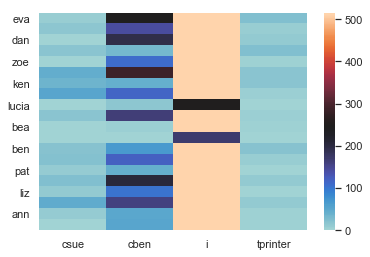

In [70]:
# Co-occurrence matrix

import seaborn as sns; sns.set()

df_collaboration = df_plot.groupby(['name','activity'])['time'].sum()

list_of_names = list(set(df_plot['name']))
list_of_activity = list(set(df_plot['activity']))

df_collab = pd.concat([pd.DataFrame([i], columns=['A']) for i in range(len(list_of_names))],ignore_index=True)
df_collab.index = list_of_names
df_collab.drop(['A'], axis=1, inplace=True)
for activity in list_of_activity:
    df_collab[activity] = 0

for name in list_of_names:
    for activity in list_of_activity:
        try:
            df_collab.loc[name,activity]=df_collaboration.loc[name,activity]
        except Exception:
            pass

ax = sns.heatmap(df_collab, vmin=0, vmax=max(df_plot['time']), center=df_collab.loc['eva', 'cben'])

In [101]:
# Interactive Scatter

import plotly_express as px

df_scatter = pd.concat([df_plot.loc[df_plot['name'] == 'amy'],df_plot.loc[df_plot['name'] == 'zoe']],ignore_index=True)

px.scatter(df_scatter, x="activity", y="time", animation_frame="date", color="name", facet_col="name")
